# Fashion MNIST

Following Chapter 10 of *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2nd Edition by Aurélien Géron.

In [ ]:
# Check imports

In [1]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.2.0'

In [2]:
keras.__version__

'2.3.0-tf'

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load Data

Fashion MNIST can be obtained directly via Keras.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

We will split the full training set into training and validation sets and scale data by dividing by 255.

In [6]:
X_val, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
          'Sneaker', 'Bag', 'Ankle boot']

In [11]:
class_names[y_train[0]]

'Coat'

## Sequential Model Building

### Basic Model

In [12]:
# Sequential model, simplest kind, single stack of layers connected sequentially
model = keras.models.Sequential()

# First layer is flatten to reshape image into 1D array. 
model.add(keras.layers.Flatten(input_shape = [28,28]))

# Add dense layers with RELU activation function
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))

# Add final layer with softmax activation and 10 units as 10 classes
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [13]:
# Get summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note lots of parameters. First hidden layer would have 300*784 weights and 300 bias terms. Lots of flexibility but also risk of overfitting.

In [15]:
# View layers
model.layers

In [16]:
# Get weights of first hidden layer
hidden_1 = model.layers[1]
weights, biases = hidden_1.get_weights()

In [17]:
weights

array([[-0.00577056, -0.04244896,  0.05530582, ...,  0.07004876,
        -0.02228712, -0.05541346],
       [ 0.03963377, -0.05582736, -0.04436785, ..., -0.07201453,
        -0.05025643, -0.02289054],
       [-0.05298258,  0.06494178,  0.03413387, ...,  0.00861682,
         0.0503285 ,  0.06871217],
       ...,
       [ 0.0534883 , -0.03300976,  0.0153859 , ..., -0.00560385,
         0.0082223 , -0.03469051],
       [-0.05201211,  0.04583472, -0.02393974, ..., -0.05047594,
         0.01290941,  0.00698657],
       [ 0.05410136,  0.04044222, -0.05784511, ..., -0.04085902,
         0.02360579, -0.02677144]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
# Compile model, select loss function and optimizer to use
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

We use `sparse_categorical_crossentropy` loss as we have sparse labels and the classes are exclusive.
Default learning rate of 0.01 for `sgd` or could specify by using `optimizer = keras.optimizers.SGD(lr = ??)`.

In [22]:
# Train model, set epochs high enough to ensure convergence (default otherwise is 1)
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7326 - accuracy: 0.7581 - val_loss: 0.5091 - val_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4906 - accuracy: 0.8286 - val_loss: 0.4464 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4459 - accuracy: 0.8440 - val_loss: 0.4145 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8533 - val_loss: 0.3980 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3983 - accuracy: 0.8590 - val_loss: 0.4123 - val_accuracy: 0.8566
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3817 - accuracy: 0.8658 - val_loss: 0.3798 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3682 - accuracy: 0.8698 - val_loss: 0.3794 - val_accuracy:

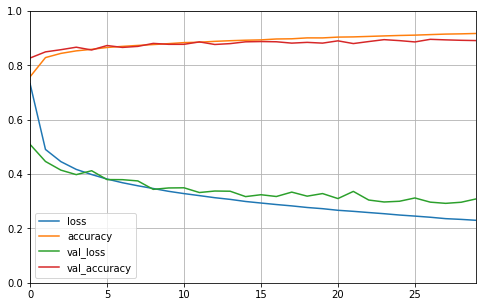

In [31]:
# Create dataframe with loss and accuracy values from history dictionary
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set vertical range to 0-1
plt.show()

Looks good, but if not would need to tweak hyperparameters such as learning rate, change optimizer, change number of layers, number of units per layer, batch size etc.

In [32]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 895us/step - loss: 64.5432 - accuracy: 0.8477


[64.54315948486328, 0.8476999998092651]

In [33]:
# Make predictions
# Use first 3 instances of test set as don't have new data
X_new = X_test[:3]

In [35]:
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

W0814 11:07:41.866970 4393528768 deprecation.py:323] From <ipython-input-36-81ace37e545f>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [40]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

### Using callbacks

In [41]:
# ModelCheckpoint saves checkpoints of model at regular intervals during training
# Save_best_only only saves model when best performance on validation set so far, avoids overfitting
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only = True)

In [42]:
# EarlyStopping interrupts training when it measures no progress on the validation set 
# for a number of epochs, specified by patience arg
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [43]:
history = model.fit(X_train, y_train, epochs = 100,
                   validation_data = (X_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2256 - accuracy: 0.9186 - val_loss: 0.2967 - val_accuracy: 0.8950
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2232 - accuracy: 0.9193 - val_loss: 0.2893 - val_accuracy: 0.8960
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2196 - accuracy: 0.9202 - val_loss: 0.2877 - val_accuracy: 0.8928
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2153 - accuracy: 0.9221 - val_loss: 0.3086 - val_accuracy: 0.8812
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2115 - accuracy: 0.9240 - val_loss: 0.3074 - val_accuracy: 0.8936
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2079 - accuracy: 0.9252 - val_loss: 0.2922 - val_accuracy: 0.8952
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2053 - accuracy: 0.9256 - val_loss: 0.2997 - val_ac

### Fine-tuning NN hyperparameters

In [44]:
# Create function that will build and compile Keras model
def build_model(n_hidden = 1, n_neurons = 30, lr = 3e-3, input_shape = [28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    optimizer = keras.optimizers.SGD(lr = lr)
    model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = optimizer,
                  metrics = ['accuracy'])
    return model

In [45]:
# Create KerasRegressor object
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)